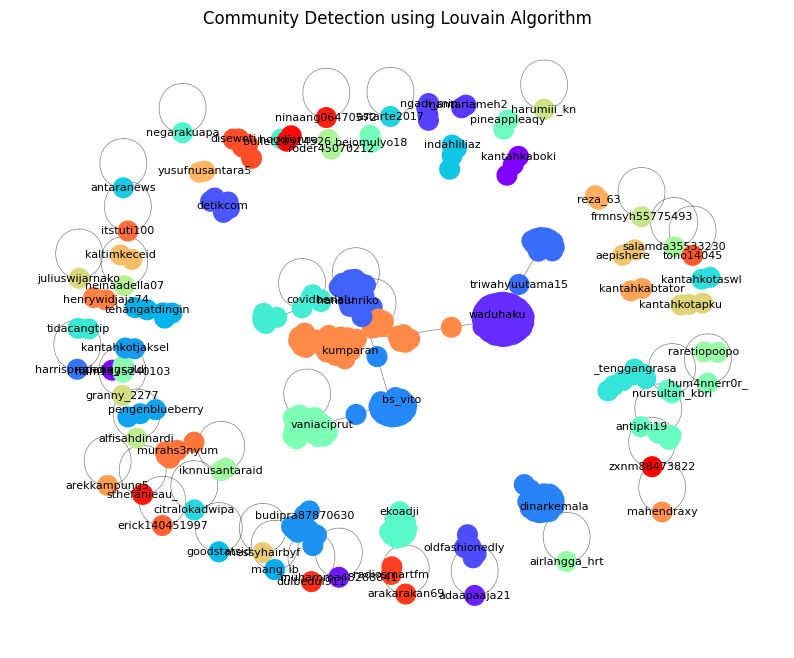

In [16]:
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt

# Membaca dataset dari file CSV
df = pd.read_csv('net_IKN_Nusantara.csv')

# Membuat graf menggunakan NetworkX
G = nx.Graph()

# Menambahkan edge (hubungan) ke graf dari kolom ke-2 dan ke-3
for i, row in df.iterrows():
    source = row[1]  # Kolom ke-2
    target = row[2]  # Kolom ke-3
    G.add_edge(source, target)

# Menjalankan algoritma Louvain
partition = community.best_partition(G)

# Menggambar graf dengan komunitas yang diberi warna berbeda
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
plt.axis('off')

# Menggambar simpul (node) dengan warna berbeda sesuai komunitas
values = [partition.get(node) for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=values, cmap='rainbow', node_size=200)

# Menggambar sisi (edge) dengan ketebalan yang sama
nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.5)

# Menampilkan label simpul pada pusat komunitas
central_nodes = {}
for node, community_id in partition.items():
    if community_id not in central_nodes:
        central_nodes[community_id] = node

labels = {}
for node, community_id in partition.items():
    if node == central_nodes[community_id]:
        labels[node] = node

nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', font_size=8)

plt.title('Community Detection using Louvain Algorithm')
plt.show()
